In [1]:
%load_ext autoreload 
%autoreload 2

In [2]:
from glob import glob 
from fastcore.xtras import load_pickle

import matplotlib.pyplot as plt 
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use(['science', 'nature'])

import matplotx

import pandas as pd 
import numpy as np

%matplotlib inline

In [3]:
all_res = glob('out/**/*.pkl')

In [4]:
compiled_res = []
compiled_gpr = []

for res in all_res:
    loaded = load_pickle(res)
    repre = loaded['representation']
    num_points = loaded['num_train_points']

    metrics = {
        'representation': loaded['representation'],
        'num_train_points': loaded['num_train_points'],
        'mae': loaded['mean_absolute_error'],
        'max_error': loaded['max_error'],
        'mse': loaded['mean_squared_error']
    }

    compiled_res.append(metrics)


    gpr_metrics = {
        'num_train_points': loaded['num_train_points'],
        'mae': loaded['gpr_baseline']['mean_absolute_error'],
        'max_error': loaded['gpr_baseline']['max_error'],
        'mse': loaded['gpr_baseline']['mean_squared_error']
    }

    compiled_gpr.append(gpr_metrics)

In [5]:
compiled_res = pd.DataFrame(compiled_res)
compiled_gpr = pd.DataFrame(compiled_gpr)

In [10]:
compiled_grouped_res = compiled_res.groupby(['representation', 'num_train_points']).agg(['mean', 'std', 'count'])

In [11]:
compiled_gpr_grouped = compiled_gpr.groupby(['num_train_points']).agg(['mean', 'std'])

In [12]:
compiled_grouped_res

mae                  max_error  \
                                     mean       std count       mean   
representation num_train_points                                        
SELFIES        10                0.941040  0.279109     2   3.340000   
               20                0.763240  0.111157     2   3.535000   
               50                0.703700  0.039174     2   3.405000   
               100               0.669780  0.003253     2   3.895000   
               200               0.635680       NaN     1   4.570000   
               1000              0.471280       NaN     1   1.720000   
SMILES         10                0.845350  0.113473     4   3.665000   
               20                0.777227  0.070203     3   3.653333   
               50                0.677280  0.062326     5   3.422000   
               100               0.647413  0.021175     3   3.143333   
               200               0.588300  0.002970     2   2.925000   
               1000              0.457500  0.058181     2   1.910000   
               5000              0.554040  0.286124     2  50.815000   

                                                        mse                   
                                       std count       mean        std count  
representation num_train_points                                               
SELFIES        10                 0.438406     2   1.343812   0.682754     2  
               20                 0.912168     2   0.906780   0.193685     2  
               50                 0.558614     2   0.829057   0.089114     2  
               100                0.318198     2   0.767653   0.022024     2  
               200                     NaN     1   0.695634        NaN     1  
               1000                    NaN     1   0.343909        NaN     1  
SMILES         10                 0.262361     4   1.173854   0.252411     4  
               20                 0.646091     3   1.002844   0.180663     3  
               50                 0.843339     5   0.770758   0.129158     5  
               100                0.109697     3   0.688937   0.054825     3  
               200                0.586899     2   0.566855   0.046898     2  
               1000               0.296985     2   0.342326   0.082707     2  
               5000              69.996500     2  20.333355  28.464127     2

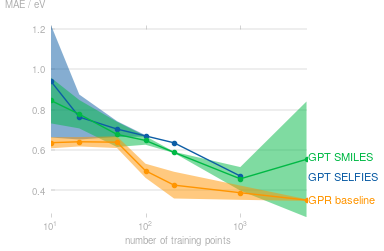

In [9]:
with plt.style.context(matplotx.styles.dufte):
    fig, ax = plt.subplots(1,1)
    ax.plot(
        compiled_grouped_res.loc["SELFIES", :].index, 
        compiled_grouped_res.loc["SELFIES", :]['mae']['mean'], 
        label='GPT SELFIES', 
        marker='o'
    )

    ax.fill_between(
        compiled_grouped_res.loc["SELFIES", :].index, 
        compiled_grouped_res.loc["SELFIES", :]['mae']['mean'] - compiled_grouped_res.loc["SELFIES", :]['mae']['std'], 
        compiled_grouped_res.loc["SELFIES", :]['mae']['mean'] + compiled_grouped_res.loc["SELFIES", :]['mae']['std'], 
            alpha=.5
    )

    ax.plot(
        compiled_grouped_res.loc["SMILES", :].index, 
        compiled_grouped_res.loc["SMILES", :]['mae']['mean'], 
        label='GPT SMILES',
        marker='o'
    )

    ax.fill_between(
        compiled_grouped_res.loc["SMILES", :].index, 
        compiled_grouped_res.loc["SMILES", :]['mae']['mean'] - compiled_grouped_res.loc["SMILES", :]['mae']['std'], 
        compiled_grouped_res.loc["SMILES", :]['mae']['mean'] + compiled_grouped_res.loc["SMILES", :]['mae']['std'], 
            alpha=.5
    )

    ax.plot(
        compiled_gpr_grouped.loc[:].index, 
        compiled_gpr_grouped['mae']['mean'], 
        label='GPR baseline',
        marker='o'
    )

    ax.fill_between(
        compiled_gpr_grouped.loc[ :].index, 
        compiled_gpr_grouped.loc[:]['mae']['mean'] - compiled_gpr_grouped.loc[ :]['mae']['std'], 
        compiled_gpr_grouped.loc[ :]['mae']['mean'] + compiled_gpr_grouped.loc[ :]['mae']['std'], 
        alpha=.5
    )

    matplotx.line_labels(fontsize=8)

    ax.set_xlabel('number of training points', labelpad=4)
    matplotx.ylabel_top('MAE / eV')
    ax.set_xscale('log')

fig.savefig('bandgap_regression_res.pdf', bbox_inches='tight')
